<a href="https://colab.research.google.com/github/YoonSungLee/University-Lectures/blob/master/Statistical-Computing/comStat2(Ch5_SciPy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'><div style="text-align: center">Ch 5. high-level scientific computing </font>

* #### scipy는 과학기술 계산을 위한 패키지임 

### <font color='blue'> Interpolation(보간법) </font>
scipy.interpolate 는 실험 결과 자료로 부터 실험하지 않은 결과를 추정하는데 유용한 방법이다.


In [0]:
import numpy as np
from matplotlib import pyplot as plt
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1 # -0.1 <= noise <= 0.1
measures = np.sin(2 * np.pi * measured_time) + noise
measures

array([-0.0049194 ,  0.73950997,  1.08186947,  0.85162396,  0.38432116,
       -0.42259125, -0.80432512, -0.92764986, -0.71636304, -0.07243556])

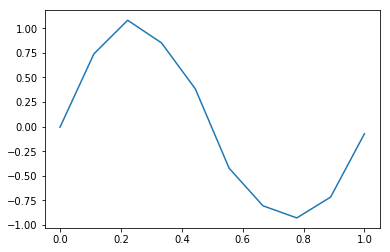

In [0]:
plt.plot(measured_time, measures) # 시험을 통해 10개 포인트의 결과를 얻었다고 가정하자.
plt.show()

In [0]:
# 관측하지 않은 포인트의 값을 추정해보자. 
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
linear_results # 선형 보간법에 의해 50개의 포인트를 추정하였다.

array([-0.0049194 ,  0.13181253,  0.26854445,  0.40527638,  0.5420083 ,
        0.67874023,  0.77444462,  0.83732697,  0.90020933,  0.96309169,
        1.02597404,  1.07717058,  1.03488059,  0.9925906 ,  0.95030061,
        0.90801061,  0.86572062,  0.79440321,  0.70857208,  0.62274096,
        0.53690983,  0.45107871,  0.35138596,  0.20317756,  0.05496916,
       -0.09323924, -0.24144764, -0.38965604, -0.47712466, -0.54723904,
       -0.61735343, -0.68746781, -0.7575822 , -0.81187562, -0.8345271 ,
       -0.85717858, -0.87983006, -0.90248154, -0.92513303, -0.89315405,
       -0.85434627, -0.81553848, -0.7767307 , -0.73792292, -0.66379753,
       -0.54552514, -0.42725274, -0.30898035, -0.19070796, -0.07243556])

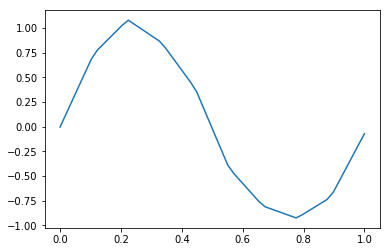

In [0]:
plt.plot(interpolation_time, linear_results)
plt.show()

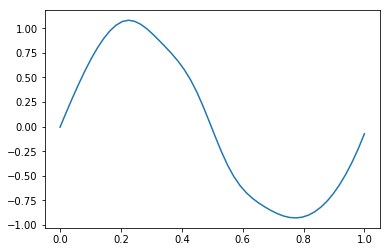

In [0]:
# 3차 곡선 보간에 의해 추정
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)
plt.plot(interpolation_time, cubic_results)
plt.show()

## ~9.16

### <font color='blue'> Optimization and fit(최적 적합) </font>  

In [0]:
import numpy as np
from matplotlib import pyplot as plt
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

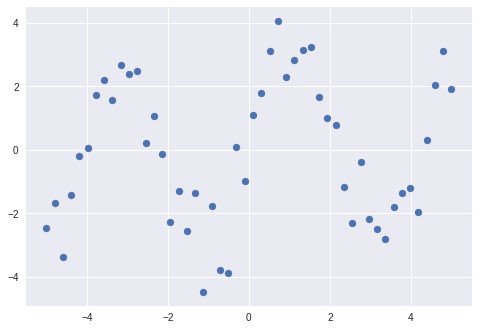

In [0]:
plt.scatter(x_data, y_data)
plt.show()

In [0]:
def test_func(x, a, b):
    return a * np.sin(b * x)
from scipy import optimize
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data) # 최소제곱법(Least Square Method) : SSE를 최소화하는 a, b 계산

# scipy.optimize.curve_fit(f, xdata, ydata) : f는 함수로 정의하며, curve_fit의 input값으로 사용할 때에는 초기값을 주지 않아도 된다

print(params)

[2.88988941 1.48943955]


![대체 텍스트](https://i.imgur.com/3R5OfO7.jpg)

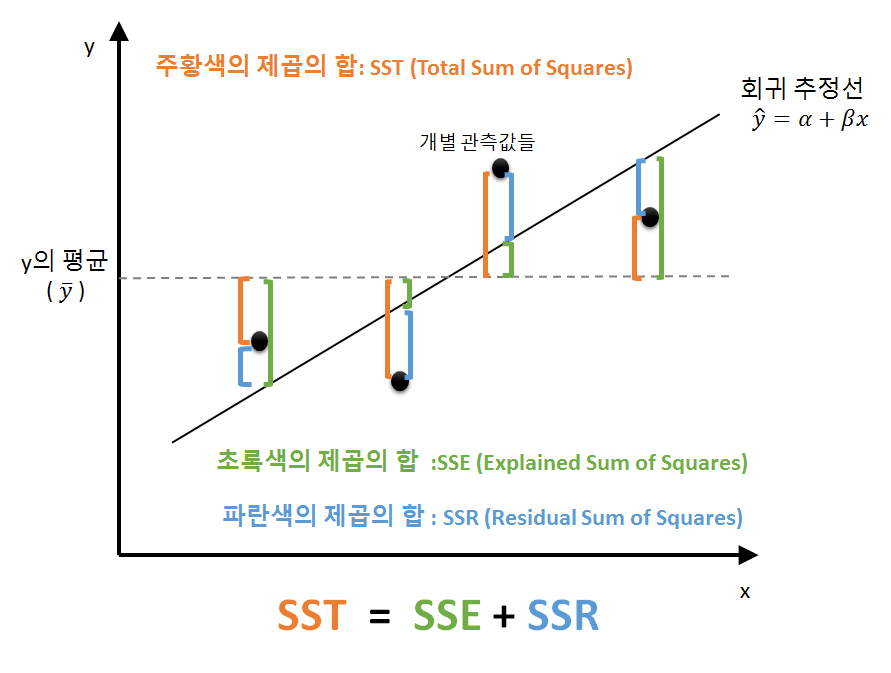

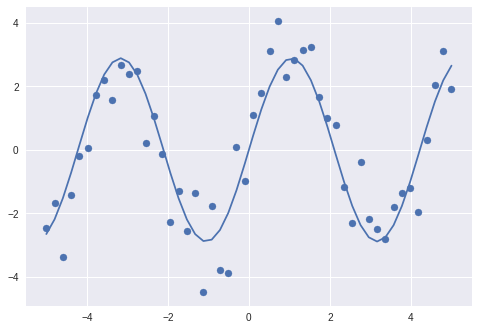

In [0]:
yHat = test_func(x_data, params[0], params[1])
plt.scatter(x_data, y_data)
plt.plot(x_data, yHat)


<font color='red'> H.W #2: p188(ScipyLectures-simple-2017.pdf). 온도 데이터의 함수를 추정해 보세요 </font>

### <font color='blue'> Finding the minimum of a scalar function </font>  

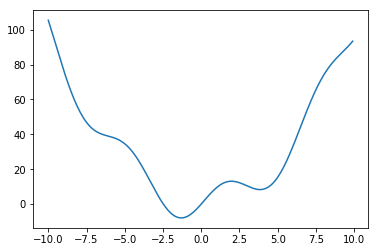

In [0]:
def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show() # 이 함수의 최소(Global Minimum)는 -1.3 근방이고, 지역 최소(Local Minimum)는 3.8 근방이다.


In [0]:
from scipy import optimize
result = optimize.minimize(f, x0=0)
result.x

array([-1.30644012])

<font color='red'> H.W #3: 함수의 최소값 위치 구하기
    (Bisection Method와 Gradient Descent Algorithm 사용)</font>

### Bisection Method(이분법)



![Bisection](https://drive.google.com/uc?id=1HpC4mdh5Yhki4gB2iau98uTh1yFJdKNJ)

* Step 1: 초기값 a, b를 설정한다. (해를 포함하는 구간으로 설정)<br>

   Let interval = (b-a) / 2; m = a + interval

* Step 2: Convexity를 체크한다.(f(a), f(b) > f(m))<br>

   상단 그림은 해가 [a, b] 사이에 있는 것이고, 하단 그림은 [a, b] 사이에 해가 없는 경우이다. <br>
   만약 해가  [a, b]에 있다면, f(a), f(b) > f(m)를 만족한다. <br>
   이때는 b=m, m = (a+b)/2, interval = interval / 2 로 수정하고 반복한다.<br>
   해가 [a, b]에 없다면 움직이는 방향을 결정해야 한다.<br>
   만약, f(a) > f(m) > f(b) 이라면 오른쪽으로 움직이고 f(a) < f(m) < f(b)라면 왼쪽으로 움직인다. <br>
   오른쪽으로 움직일 때에는 a = a + interval, 왼쪽으로 움직일 때에는 a = a - interval 로 정의하고 <br>
   m = a + interval, b = m + interval 로 정의하고 반복하다.<br>
   
   interval이 너무 작아 무시할 만하면(interval<10e-6) 반복을 중지하고 m을 출력한다.
   
<br>

###  Gradient Descent Algorithm(경사하강법)
$ x = x - \alpha \frac {\partial}{\partial x} f(x), \alpha $  is learning rate 

## ~9.18

#### Exercise: 2차원 함수의 최소 위치 구하기
The six-hump camelback function
$$ f(x,y) =\big (4 - 2.1 x^2 + \frac {x^4}{3} \big)x^2 + xy+(4y^2 -4)y^2 $$

위 함수는 global minimum과 여러개의 local minimum을 갖는다.<br> 
이 함수의 global minimum 위치를 구해보자.


In [0]:
import numpy as np
from matplotlib import pyplot as plt

# Define the function that we are interested in
def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
           + (-4 + 4*x[1]**2) * x[1] **2)
# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

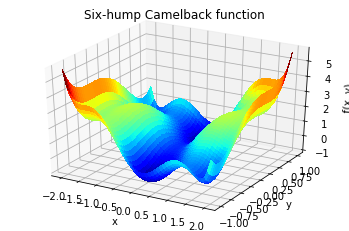

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
cmap=plt.cm.jet, linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')
plt.show()

In [0]:
from scipy import optimize
x_min = optimize.minimize(sixhump, x0=[-2,1])
print(x_min.x[0], x_min.x[1])

-0.08984201922456785 0.7126563958911258


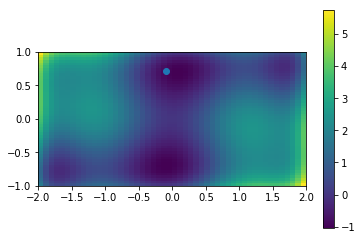

In [0]:
# Show the function in 2D
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()
# And the minimum that we've found:
plt.scatter(x_min.x[0], x_min.x[1])
plt.show()


### <font color='blue'> 함수의 해 구하기 </font> 
f(x) = 0를 만족하는 해를 구해보자.


In [0]:
def f(x):
    return x**2 + 10*np.sin(x)
root = optimize.root(f, x0=1)

In [0]:
root.x

array([0.])

In [0]:
root2 = optimize.root(f, x0=-2.5)

In [0]:
root2.x

array([-2.47948183])

In [0]:
f(-2.47948183)

-4.5491847622258774e-08

### <font color='blue'> Fast Fourier transforms: scipy.fftpack </font> 

이미지가 행렬이란 것을 알았다. 그렇다면, 소리는 어떤 형태의 자료일까?
아나로그 소리가 녹음기에 입력될 때, 발생하는 미세한 떨림의 파형을 이산형 디지털 형태로 추출(아주 작은 단위 시간별로 추출)하여 저장했다가 이를 아나로그 파형으로 변환하여 복원하는 방식이다.
이 때, 파형은 아래 그림과 같은 형태로 나타난다.

푸리에 변환은 시간에 따른 주파수의 변화를 여러 주기 함수의 합 혹은 적분으로 표현이 가능하다는 이론이다.(하나의 복잡한 파형이 여러 개의 주기적인 파형들의 합으로 표현이 가능하다)
 

![fourier](https://drive.google.com/uc?id=16OttyaWuoAklVR5bLNXClfaD5F3ItnQx)

모든 신호들은 사인과 코사인의 합으로 표현이 가능하다.
여기서, f(x)는 입력신호이고, $exp(j \ 2\pi \ ux)$ 는 주파수가 u인 주기성분이다.F(u)는 해당 주기 함수의 계수 값이다.

$$ f(x) = \int_{-\infty}^{\infty} F(u) exp(j \ 2\pi \ ux) du,\  j = \sqrt{-1} $$

오일러 공식에 의해 아래와 같이 표현이 가능함

$$ exp(j\theta) = cos(\theta) + j sin(\theta) $$

F(u)는 다시 역으로 신호의 적분으로 표현이 가능함

$$  F(u) = \int_{-\infty}^{\infty} f(x) exp(-j \ 2\pi \ ux) dx $$

![fourier1](https://drive.google.com/uc?id=1NsJ-lxOTTg6_BoBQIFzU_ShilibzuShz) 


• scipy.fftpack.fft(): 입력신호에 대해 푸리에 변환을 수행한다.. <br>
• scipy.fftpack.fftfreq(): 일정구간의 sampling frequency를 생성한다. <br>
• scipy.fftpack.ifft() 푸리에 역변환을 통해 주파수를 신호로 변환한다. 

![대체 텍스트](https://i.imgur.com/MTPiWit.jpg)

In [0]:
import numpy as np
from matplotlib import pyplot as plt
# signal generation 
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
+ 0.5 * np.random.randn(time_vec.size))

In [0]:
sig.shape

(1000,)

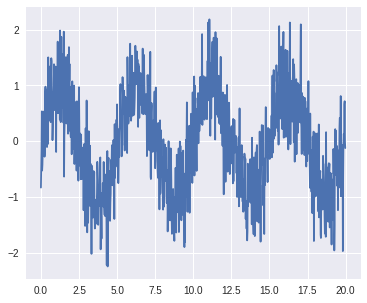

In [0]:
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.show()

In [0]:
from scipy import fftpack
sig_fft = fftpack.fft(sig) # 신호를 주파수별 power로 표시함 

In [0]:
sig_fft # (1000,)

array([ 6.88478175e+00+0.00000000e+00j, -8.64891149e+00+2.14288427e+01j,
        1.35937942e+01+1.16316137e+01j,  6.90061133e+00-1.18101884e+01j,
        1.85732643e+00-4.96597251e+02j, -9.43644943e+00+1.83871359e+01j,
        1.32395898e+01-1.95044908e+00j, -2.74988164e+00+3.95464090e+00j,
        4.25350264e+00-1.94994924e+01j,  8.88615307e+00+1.40171115e+01j,
       -1.85479362e+01+1.18784354e+01j, -5.35955370e+00-3.03842354e+00j,
       -9.57599714e+00+7.00805559e+00j, -3.46983002e+00-2.16796793e+01j,
        3.55454194e+00+8.70542803e+00j, -1.06698235e+01+2.27523936e+01j,
       -4.58107612e-01-6.36910074e+00j, -2.30298757e+01+8.48816063e+00j,
       -9.07833523e+00-2.90317657e+00j, -1.88810085e+00+1.66190049e+00j,
       -3.79268954e+00+1.36823124e+00j, -5.14275313e+00+2.55245813e-01j,
       -1.21067930e+00-1.67472146e+00j, -1.12784027e+01-4.82476940e+00j,
       -1.14724685e+01+1.43163200e+01j, -1.38587543e+01-9.03043434e+00j,
        7.55808098e-01+1.15245871e+01j, -3.07260237

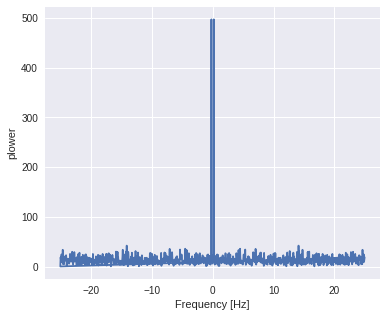

In [0]:
# Obtain power given frequency 
power = np.abs(sig_fft) # sqrt(a^2 + b^2), 복소수의 절대크기를 계산(원점으로 부터 거리)
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
plt.show()
# 아래 그림으로부터 주파수 0 부분의 파형이 집중되어 있음을 알 수 있음

In [0]:
power.shape

(1000,)

In [0]:
power

array([  6.88478175,  23.10841774,  17.89093846,  13.67841316,
       496.60072416,  20.66720453,  13.38248813,   4.81674513,
        19.9580181 ,  16.59647946,  22.02551165,   6.16091174,
        11.866447  ,  21.95559643,   9.40315083,  25.12999298,
         6.38555454,  24.54432814,   9.53124361,   2.51532066,
         4.0319413 ,   5.14908343,   2.0665034 ,  12.26706022,
        18.34596828,  16.5412761 ,  11.54934435,  16.5559119 ,
        19.45339854,   7.37514933,  13.83050739,  12.99335547,
        11.16724094,  23.29748186,  12.76362489,   9.15591975,
        13.92488417,  16.92168359,  17.03370711,   7.16844766,
         7.9666889 ,  20.84180671,  27.57178868,  26.28846665,
         6.40420295,   7.05363674,   8.72033667,   6.18614576,
         6.8506575 ,  16.52082227,  25.51436496,  11.06492815,
        10.40893158,   9.09675188,  28.11044356,   5.22311851,
        22.81357811,  16.86766774,  24.847161  ,   2.77433381,
        13.23272072,   7.15266297,  15.94968633,   5.72

In [0]:
# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]

peak_freq = freqs[power[pos_mask].argmax()] # peak_freq = 0.2#
power[pos_mask].argmax()


3

In [0]:
power[pos_mask] # 498.7 is max power at freq = 0.2

array([  9.972087  ,  23.85762225,  13.40240051, 479.48693568,
        13.09266351,  21.74348556,  13.91902774,  19.72608274,
        35.01349666,  12.91639517,  38.33481681,   9.40505466,
        15.95587393,  30.33784852,  10.15959357,  24.4523147 ,
        12.0683087 ,   7.68438946,   8.47516657,  10.95964151,
        27.20435426,   9.51514946,  17.41835877,  26.85439402,
        15.58445915,   9.21351241,   2.59726604,  19.74937193,
        15.6636443 ,  10.69007235,   2.41820799,   6.41435736,
        12.08465629,  13.49723811,   4.30981968,  28.34480621,
         4.84285778,  19.29371641,  18.67173866,   7.68742926,
        12.14431273,   7.10473128,   5.63386246,   9.24337423,
         8.47593344,   5.112204  ,  13.27166368,  19.18201778,
        24.43921679,  18.57677811,   8.10924455,  12.86022013,
        13.08712172,  14.24150297,  12.72564857,  23.97132429,
        11.39030408,  20.10025548,  13.6336245 ,  15.67638373,
         6.38075617,   6.05406269,  10.33982356,  15.42

In [0]:
# exctract noise(A signal with a frequency greater than 0.2 is set to zero.)
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0 
high_freq_fft

array([ 31.07011792  +0.j        ,   5.03316312  +7.42411814j,
        -4.57417644 -16.35580233j,  15.20860101 +18.1057385j ,
       -15.03469154-511.53855681j,   0.          +0.j        ,
         0.          +0.j        ,   0.          +0.j        ,
         0.          +0.j        ,   0.          +0.j        ,
         0.          +0.j        ,   0.          +0.j        ,
         0.          +0.j        ,   0.          +0.j        ,
         0.          +0.j        ,   0.          +0.j        ,
         0.          +0.j        ,   0.          +0.j        ,
         0.          +0.j        ,   0.          +0.j        ,
         0.          +0.j        ,   0.          +0.j        ,
         0.          +0.j        ,   0.          +0.j        ,
         0.          +0.j        ,   0.          +0.j        ,
         0.          +0.j        ,   0.          +0.j        ,
         0.          +0.j        ,   0.          +0.j        ,
         0.          +0.j        ,   0.          +0.j  

d:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


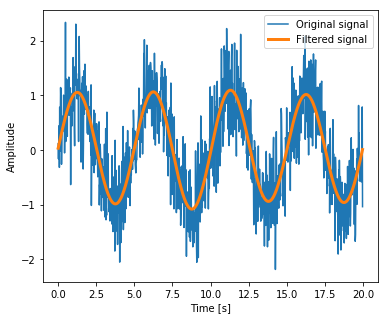

In [0]:
filtered_sig = fftpack.ifft(high_freq_fft) # inverse Fourier transformation
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.show()

# 이는 소리 신호에서 원하는 부분만 남기고 지울 수 있음을 의미함

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
fs, data = wavfile.read('/gdrive/My Drive/전산통계/data/AngryDogBark.wav') # load the data
a = data.T[0] # this is a two channel soundtrack, I get the first track
b = [(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
d

846848.0

In [0]:
import numpy as np
c

array([-1753370.5703125     +0.j        ,
          40790.64182305+46450.31914334j,
           3492.12147322-53280.89645584j, ...,
         -38090.28153682-41875.21418581j,
           3492.12147322+53280.89645584j,
          40790.64182305-46450.31914334j])

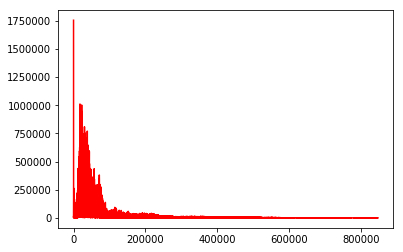

In [0]:

plt.plot(abs(c[:int(d-1)]),'r') 
plt.show()

In [0]:
x = abs(c[:int(d-1)])
len(x)

846847

In [0]:
x = x[:800000].reshape((-1,1000))


In [0]:
feat = np.mean(x, axis=1)

In [0]:
feat.shape

(800,)

In [0]:
feat

array([6.76402891e+04, 8.73268652e+04, 5.94323396e+04, 3.32643475e+04,
       2.43690556e+04, 2.47543363e+04, 2.78717323e+04, 4.49171736e+04,
       5.18773502e+04, 4.88086573e+04, 6.69871275e+04, 9.79810714e+04,
       1.52147972e+05, 1.40969141e+05, 1.78399064e+05, 1.83094585e+05,
       1.97442905e+05, 3.14373398e+05, 2.60511785e+05, 2.47890901e+05,
       2.41442228e+05, 2.70493513e+05, 3.52902008e+05, 2.96814878e+05,
       2.23933979e+05, 1.83982392e+05, 1.45844267e+05, 1.59615805e+05,
       1.47510200e+05, 2.23006839e+05, 2.91352839e+05, 2.83233816e+05,
       2.14053753e+05, 1.81369574e+05, 1.74207585e+05, 1.92834561e+05,
       1.97186468e+05, 2.38597859e+05, 2.42618585e+05, 1.84725955e+05,
       2.15202100e+05, 1.89343667e+05, 2.00101927e+05, 1.98402179e+05,
       1.63133115e+05, 1.63412046e+05, 1.42903417e+05, 1.20009220e+05,
       1.49412232e+05, 1.21004812e+05, 1.23831096e+05, 1.05057751e+05,
       9.14096786e+04, 1.07150510e+05, 1.21165748e+05, 8.94498233e+04,
      

In [0]:
#00b01445_nohash_0.wav

fs, data = wavfile.read('/gdrive/My Drive/전산통계/data/00f0204f_nohash_0.wav') # load the data
a = data.T[0] # this is a two channel soundtrack, I get the first track
data.shape

(16000,)

In [0]:
#b = [(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)

a


-14

### <font color='blue'> Image manipulation: scipy.ndimage </font> 


In [0]:
from scipy import misc # Load an image
face = misc.face(gray=True)
from scipy import ndimage # Shift, roate and zoom it
shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 4)
face.shape

(768, 1024)

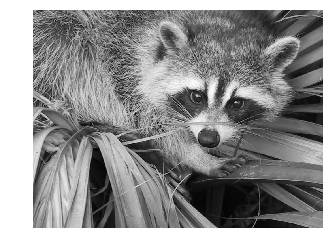

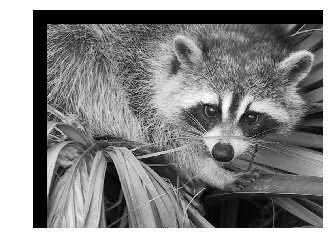

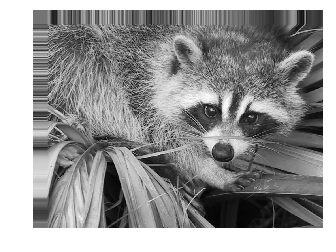

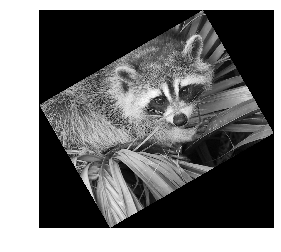

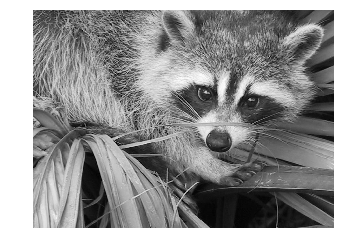

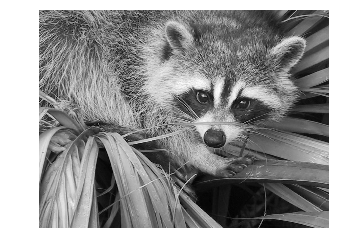

In [0]:
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(shifted_face2, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(zoomed_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [0]:
face.shape

(768, 1024)

## ~9.23

* 이미지 회전 알고리즘 <br>
  P(x,y)를 각도 $\theta$ 만큼 반시계방향으로 회전하면 아래와 같이 $P'(xcos(\theta)-ysin(\theta), xsin(\theta)+ycos(\theta)) $ 이 된다. 
  
  이를 행렬로 나타내면 
  
   $$
   \begin{equation*}
   \left(\begin{array}{cc} x'\\
                           y'\end{array}\right) = 
   \left(\begin{array}{cc} cos \theta & -sin \theta \\
                           sin \theta & cos \theta \end{array}\right)
   \left(\begin{array}{cc} x\\
                           y\end{array}\right)                        
\end{equation*}  $$

  이를 변환된 이미지 기준으로 변형하면 아래와 같이 변환하면 된다. 

  $$
   \begin{equation*}
   \left(\begin{array}{cc} x\\
                           y\end{array}\right) = 
   \left(\begin{array}{cc} cos \theta & sin \theta \\
                           -sin \theta & cos \theta \end{array}\right)
   \left(\begin{array}{cc} x'\\
                           y'\end{array}\right)                        
\end{equation*}  $$  
<br>
* 변환된 x'와 y'에 대응되는 x와 y값을 찾으면 빈 칸 없이 픽셀을 채울 수 있다.<br><br>
![rotate](https://drive.google.com/uc?id=1b7i7ksCtk_MIMLmqMb6KMEk4WxMp-5t4)



### <font color='blue'> Image filtering </font> 

In [0]:
from scipy import misc
face = misc.face(gray=True)
face = face[:512, -512:] # crop out square on right
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape) # np.random.standard_normal : 표준정규분포

In [0]:
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)



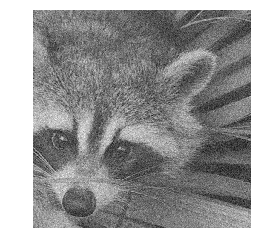

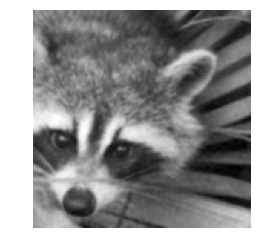

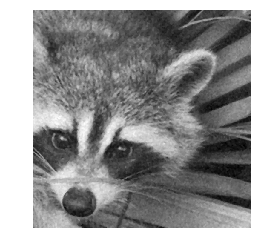

In [0]:
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()


# * Gaussian Filter

 ![gaussianFilter](https://drive.google.com/uc?id=1dQwVUf2ifgpO_tIj9O3QC291mNApwl87)
 
# * Median Filter
미디언 필터(Median Filter)는 주어진 마스크 영역의 값들을 크기 순서대로 정렬한 후 중간 크기의 값을 선택하는 필터입니다.

   ![medianFilter](https://drive.google.com/uc?id=1znF-fK0CfTXHeUiqFLJ9GxkZGA9yHNXh)
<br>
예를들어 3×3 마스크가 씌워진 영역의 값이 다음과 같다면

값을 크기순으로 정렬하면 '33-54-67-84-102-163-189-212-224'가 됩니다.
이 중에서 중간 크기의 값인 '102'가 가운데 부분에 저장됩니다.(원래값 189가 있던 위치)

중간 크기의 값을 찾는 미디언 필터는 소금&후추 잡음(Salt&Pepper Noise)이라고 불리는 임펄스성 잡음(Impluse Noise)을 제거하는데 효과적입니다.

median of [33, 54, 67, 84, 102, 163, 189, 212, 224] = 102 <br>
Window[0,0] = 102 (Change 189 -> 102)

미디언 필터의 동작 구조를 간단한 그림으로 보자면 다음과 같습니다.

![대체 텍스트](http://pds12.egloos.com/pds/200904/15/65/d0017465_49e5cd4d71f46.jpg)

마스크가 씌워진 3개의 값을 읽어들여 크기 순서대로 정렬한 후 중간크기의 값을 사용하기 때문에 임펄스성으로 튀는 잡음을 제거하는데 효과적인 능력을 발휘합니다.

<font color='red'> H.W #3: 이미지 변환 실습 </font>

### <font color='blue'> Ex. 2: counting bubbles and unmolten grains from microscopy image</font> 

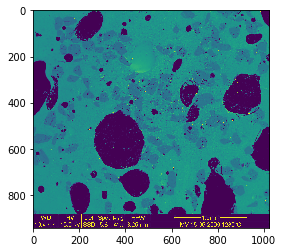

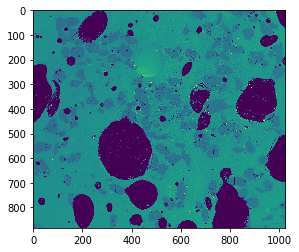

(883, 1024)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage # Shift, roate and zoom it
dat = plt.imread('/gdrive/My Drive/전산통계/image/MV_HFV_012.jpg')

plt.imshow(dat)
plt.show()
dat = dat[:-60]
plt.imshow(dat)
plt.show()
dat.shape

In [0]:
filtdat = ndimage.median_filter(dat, size=(7,7))
filtdat.shape

(883, 1024)

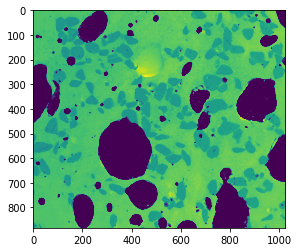

In [0]:
plt.imshow(filtdat)
plt.show()


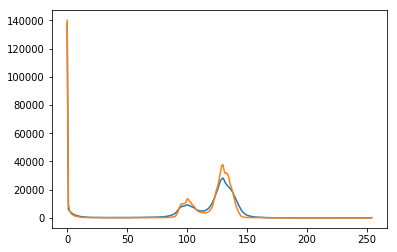

In [0]:
# 픽셀 : 0~255 사이의 값
# 히스토그램 의미 : 픽셀이 갖는 값에 대한 빈도수(80~100, 120~150 사이의 값들이 무수히 분포)

hi_dat, bins = np.histogram(dat, bins=np.arange(256))
hi_filtdat,  bins = np.histogram(filtdat, bins=np.arange(256))
fig, ax = plt.subplots()
ax.plot(bins[:-1], hi_dat)
ax.plot(bins[:-1], hi_filtdat)
plt.show()

In [0]:
# (883, 1024) Picture marks sand and glass as True or False
# area1, area2, area3는 True와 False의 조합
area1 = filtdat <= 80
area2 = np.logical_and(filtdat > 80, filtdat <= 114)
area3 = filtdat > 114

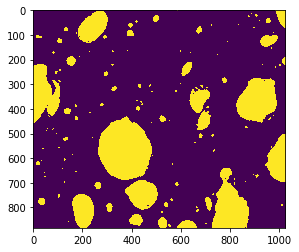

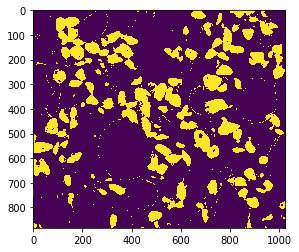

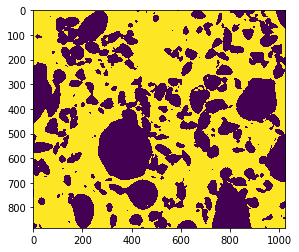

In [0]:
# astype을 통해 Boolean을 int로 변환

plt.imshow(area1.astype(np.int)) # void area(유리의 비어있는 곳, 품질관리의 대상)
plt.show()
plt.imshow(area2.astype(np.int)) # unmolten grain area(녹지 않는 불순물)
plt.show()
plt.imshow(area3.astype(np.int)) # glass area
plt.show()

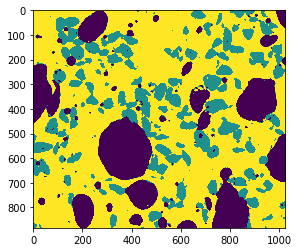

In [0]:
phases = area1.astype(np.int) + 2*area2.astype(np.int) + 3*area3.astype(np.int)
plt.imshow(phases) 
plt.show()

In [0]:
# area labeling and counting example
from scipy.ndimage import label, generate_binary_structure
a = np.array([[0,0,1,1,0,0],
              [0,0,0,1,0,0],
              [1,1,0,0,1,0],
              [0,0,0,1,0,0]]) # 1의 집합으로 이루어진 4개의 군집 존재
labeled_array, num_features = label(a)
labeled_array, num_features

(array([[0, 0, 1, 1, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [2, 2, 0, 0, 3, 0],
        [0, 0, 0, 4, 0, 0]], dtype=int32), 4)

In [0]:
area1_op = ndimage.binary_opening(area1, iterations=2) # corner smoothing
area1_labels, area1_nb = ndimage.label(area1_op) # void area labeling and counting

In [0]:
area1_nb  # 유리의 비어있는 곳(군집)의 개수

107

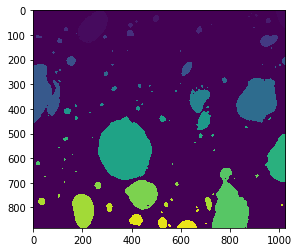

In [0]:
plt.imshow(area1_labels.astype(np.int)) 

<font color='red'> H.W #4: Candle Counting </font>
* counting the number of candles. <br>
![candle](https://drive.google.com/uc?id=1YHUAzPSbm7mUvVG30eV48qY83VJfSh98)
* R, G, B의 색깔 히스토그램 생성
* 빈도가 높은 색을 True, 나머지 False
* 군집의 개수 계산
* 한계 : 낮은 해상도, 건물 유리창의 이미지

### <font color='blue'> <div style="text-align: center">End of Chapter </font> 